<a href="https://colab.research.google.com/github/gapalyt/project2/blob/main/%EA%B2%B0%EB%B9%99%EC%B7%A8%EC%95%BD%EA%B5%AC%EA%B0%84_%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파일

In [ ]:
import pandas as pd

df = pd.read_csv('/content/결빙취약구간 현황.csv', encoding = 'cp949')
df

FileNotFoundError: ignored

In [ ]:
df.rename(columns = {'노선' : '노선명'}, inplace = True)
df

In [ ]:
one_df = df['노선명']
one_df

## 노선명 csv 파일 저장

In [ ]:
one_df.to_csv('결빙취약구간 현황_노선명.csv', encoding='utf-8-sig')

## csv 파일 저장

In [ ]:
df.to_csv('결빙취약구간 현황_수정.csv', encoding='utf-8-sig')

## 시각화

In [ ]:
from google.colab import drive 

drive.mount('/content/drive') # 드라이브 마운트

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df_freeze = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/I/파이널 프로젝트/자료/결빙취약구간 현황_수정.csv')
df_freeze

,Unnamed: 0,관리번호,본 부,지 사,노선명,시점,종점,방향,연장(km)
0,0,1,수도권,인천,수도권제1순환선,92.00,93.0,양방향,1.00
1,1,2,수도권,시흥,서해안선,333.00,334.0,양방향,1.00
2,2,3,수도권,시흥,수도권제1순환선,96.00,97.0,양방향,1.00
3,3,4,수도권,군포,영동선,19.00,20.0,양방향,1.00
4,4,5,수도권,군포,영동선,33.00,34.0,양방향,1.00
...,...,...,...,...,...,...,...,...,...
161,161,162,부산경남,서울산,경부선,53.00,56.0,양방향,3.00
162,162,176,서울춘천,춘천,서울양양선,11.65,15.0,양방향,3.35
163,163,177,서울춘천,춘천,서울양양선,20.00,22.0,양방향,2.00
164,164,178,서울춘천,춘천,서울양양선,26.00,28.0,양방향,2.00


In [ ]:
df_freeze.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_freeze

,관리번호,본 부,지 사,노선명,시점,종점,방향,연장(km)
0,1,수도권,인천,수도권제1순환선,92.00,93.0,양방향,1.00
1,2,수도권,시흥,서해안선,333.00,334.0,양방향,1.00
2,3,수도권,시흥,수도권제1순환선,96.00,97.0,양방향,1.00
3,4,수도권,군포,영동선,19.00,20.0,양방향,1.00
4,5,수도권,군포,영동선,33.00,34.0,양방향,1.00
...,...,...,...,...,...,...,...,...
161,162,부산경남,서울산,경부선,53.00,56.0,양방향,3.00
162,176,서울춘천,춘천,서울양양선,11.65,15.0,양방향,3.35
163,177,서울춘천,춘천,서울양양선,20.00,22.0,양방향,2.00
164,178,서울춘천,춘천,서울양양선,26.00,28.0,양방향,2.00


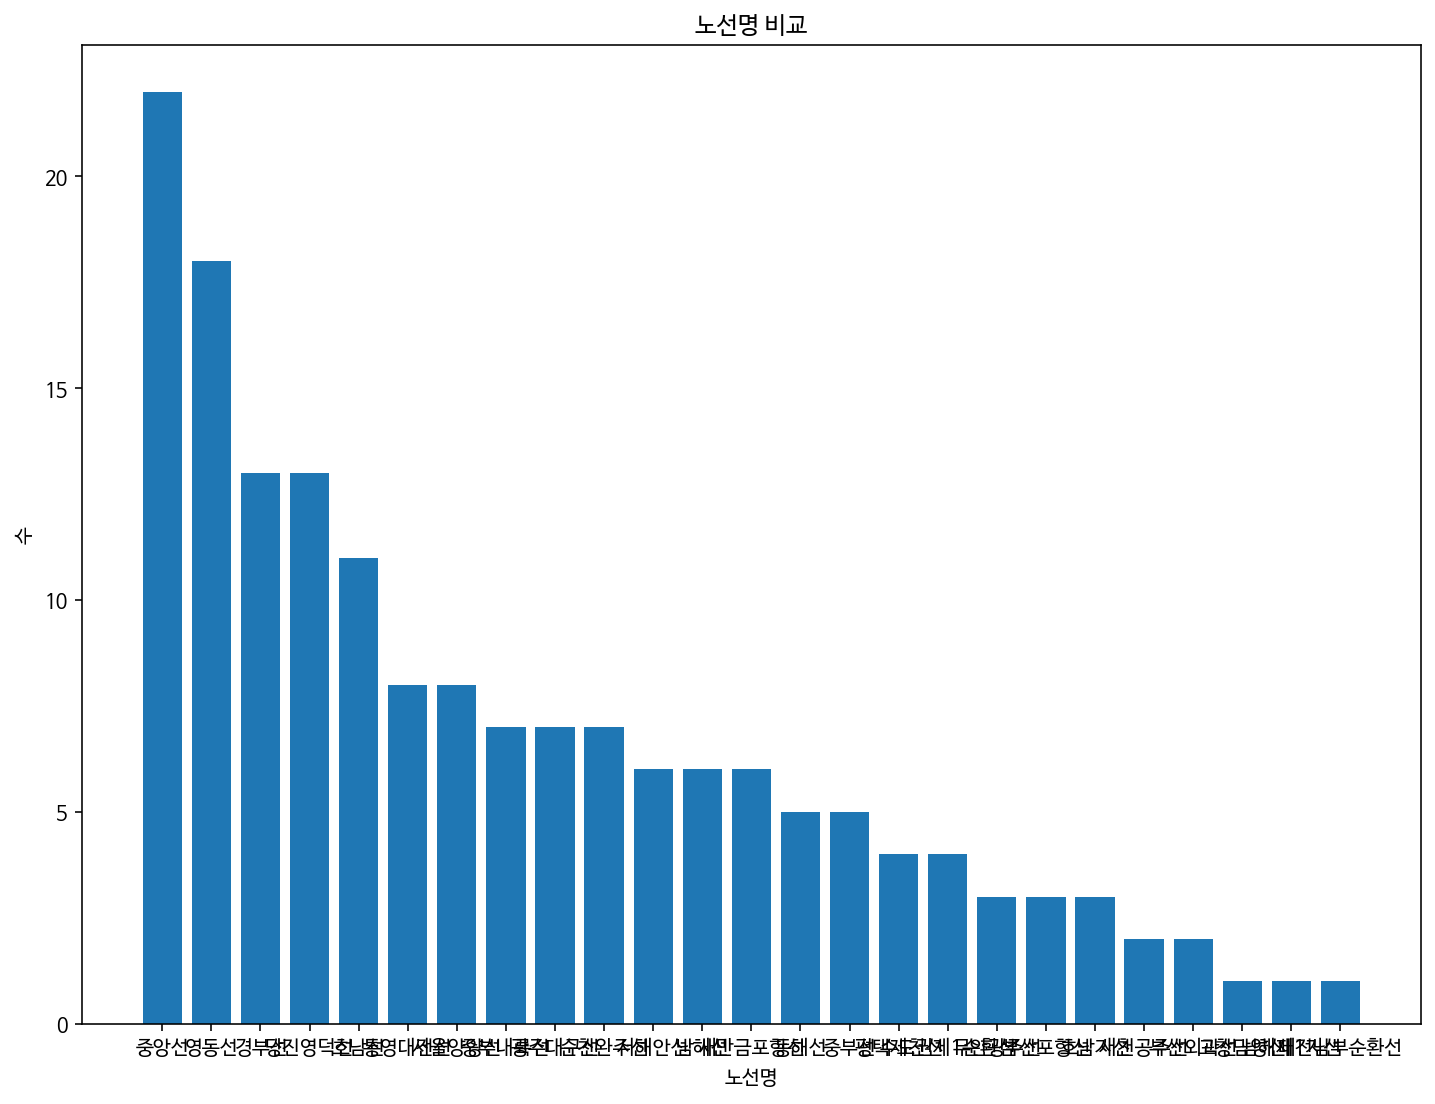

In [ ]:
# 시각화 - 노선명

# 한글 깨짐
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = 'C:\Windows\Fonts\맑은 고딕/malgun.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

# bar 차트
x = df_freeze['노선명'].value_counts().index.tolist()
y = df_freeze['노선명'].value_counts().values.tolist()
plt.xlabel('노선명')
plt.ylabel('수')
plt.title('노선명 비교')
plt.bar(x, y)

plt.show()

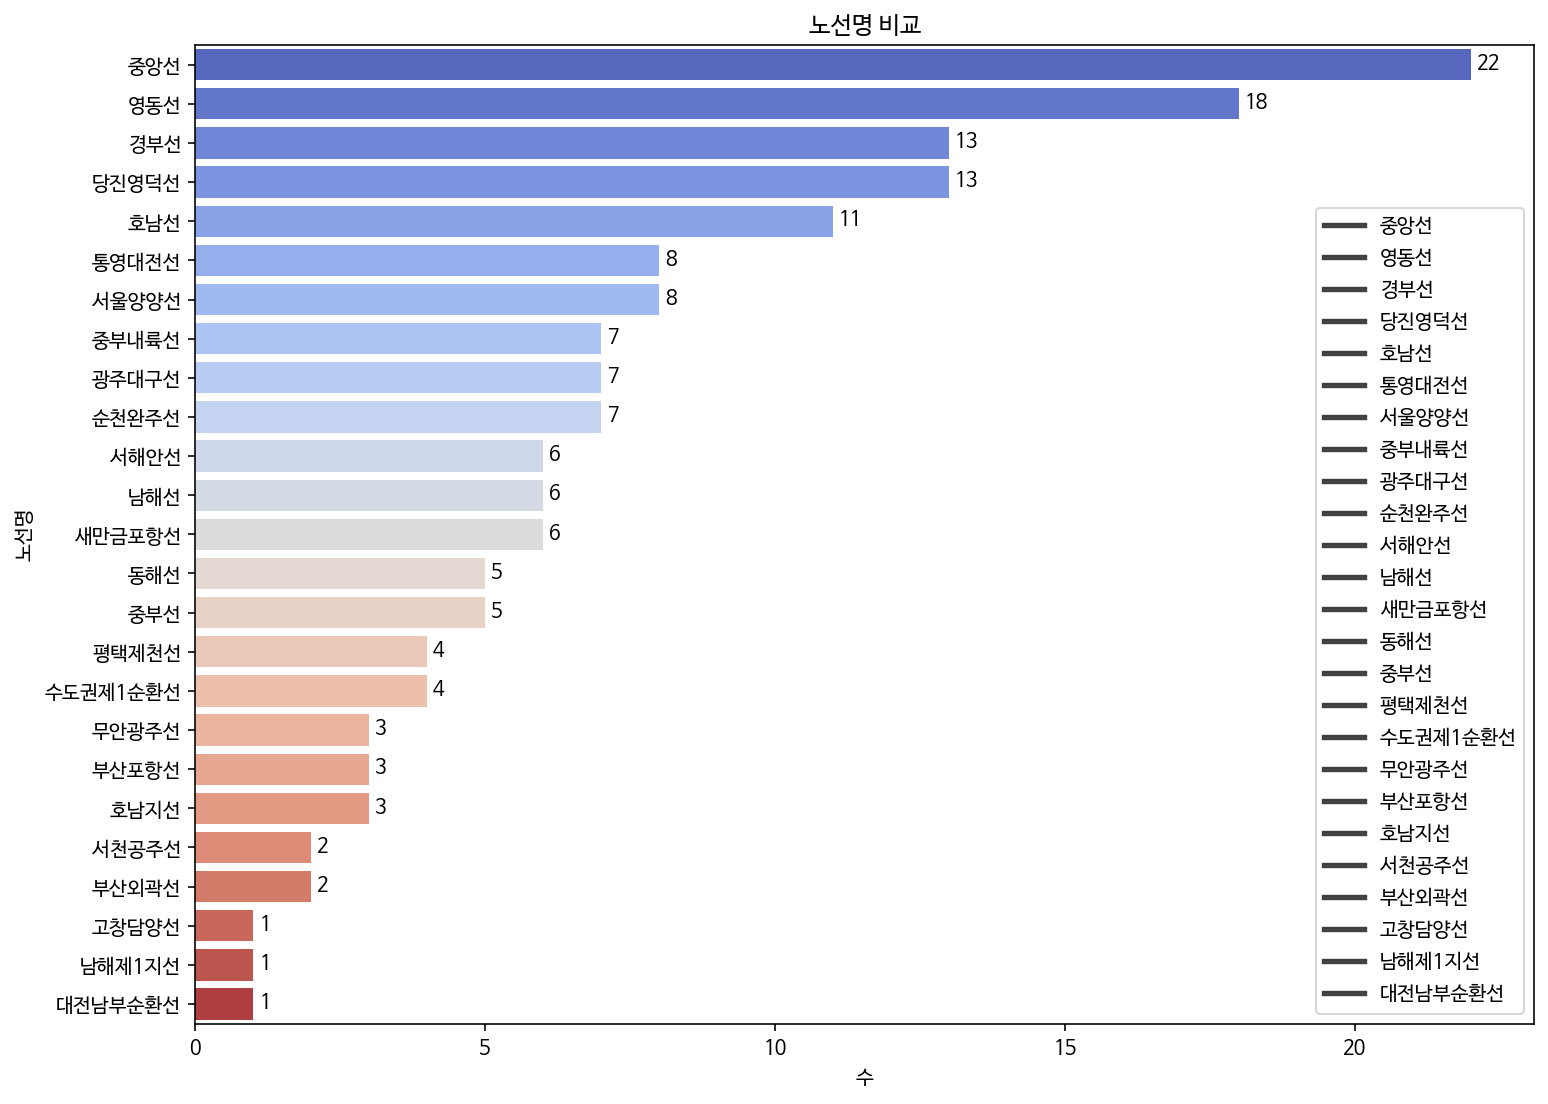

In [ ]:
import seaborn as sns

# barplot 차트
x = df_freeze['노선명'].value_counts().index.tolist()
y = df_freeze['노선명'].value_counts().values.tolist()
sns.barplot(x = y, y = x, palette = 'coolwarm', orient='h')
plt.legend(labels = x, loc = 'best')
plt.xlabel('수')
plt.ylabel('노선명')
plt.title('노선명 비교')

# 값 표시
for index, value in enumerate(y):
  plt.text(value + 0.1, index + 0.1, str(value))  

plt.show()

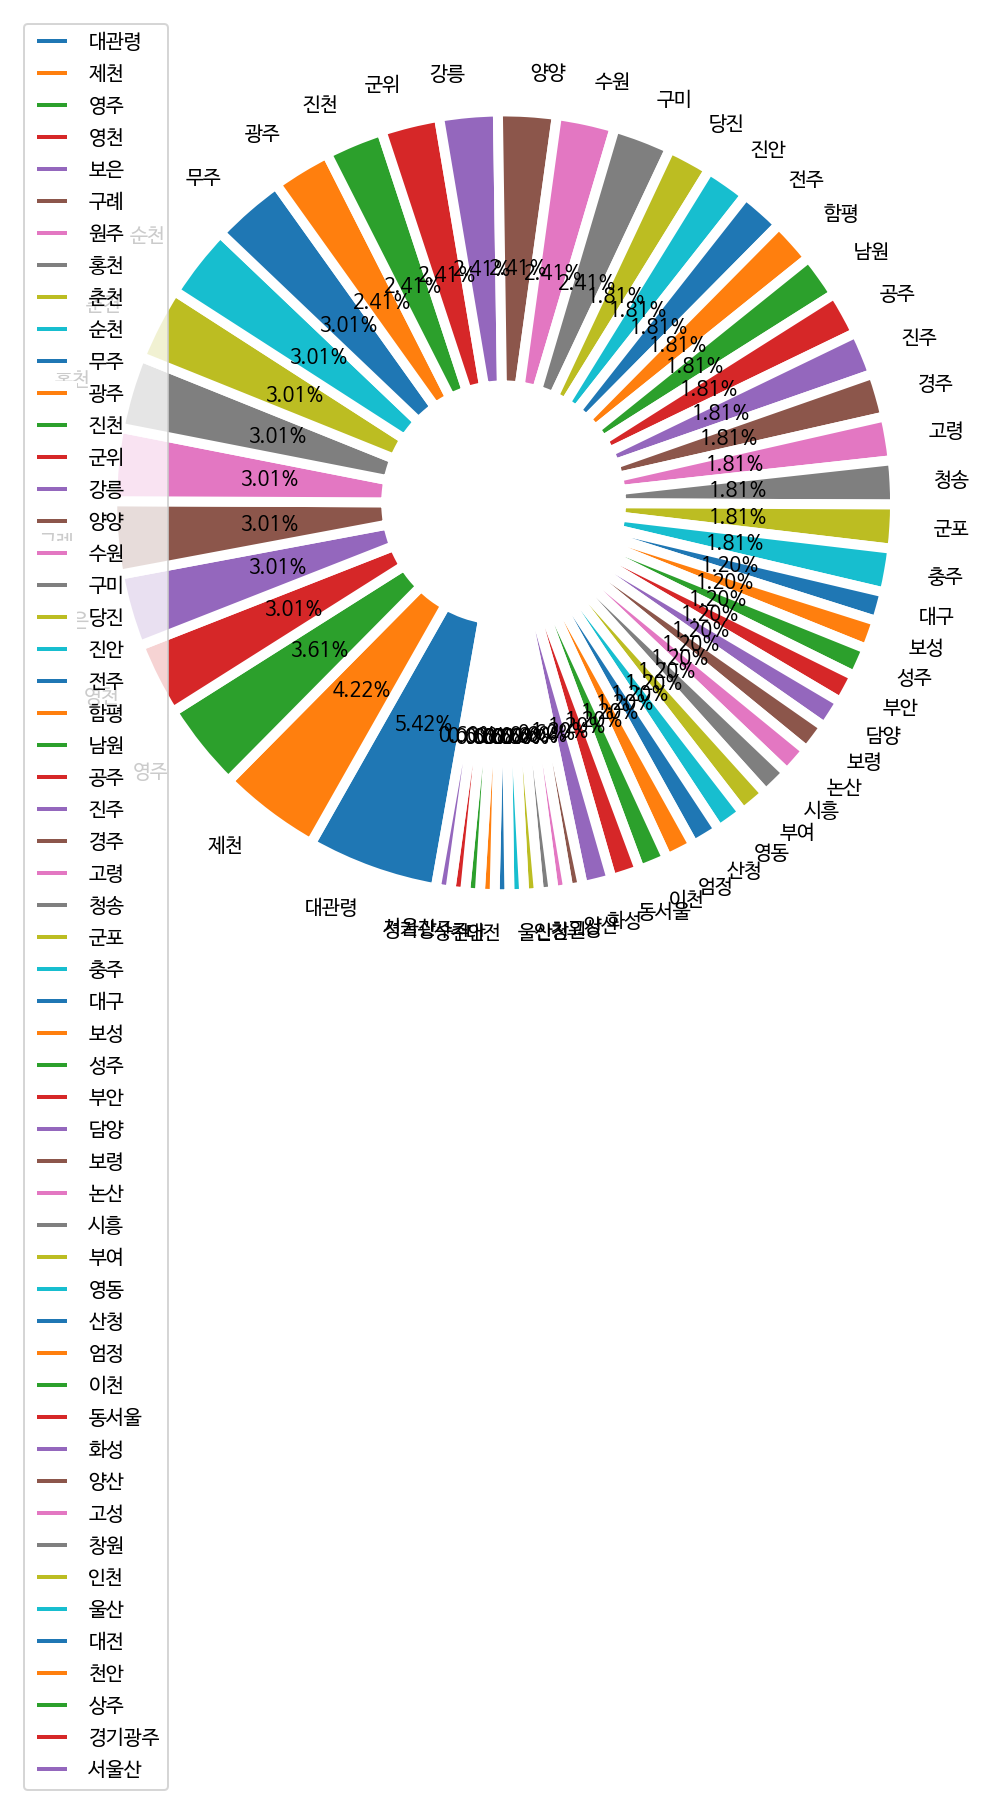

In [ ]:
# 시각화 - 지사

# 파이 차트
x = df_freeze['지 사'].value_counts().index.tolist()
y = df_freeze['지 사'].value_counts().values.tolist()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(y, labels = x, autopct = '%.2f%%', startangle = 260, counterclock = False, wedgeprops = wedgeprops)
plt.legend(loc = 'best')

plt.show()

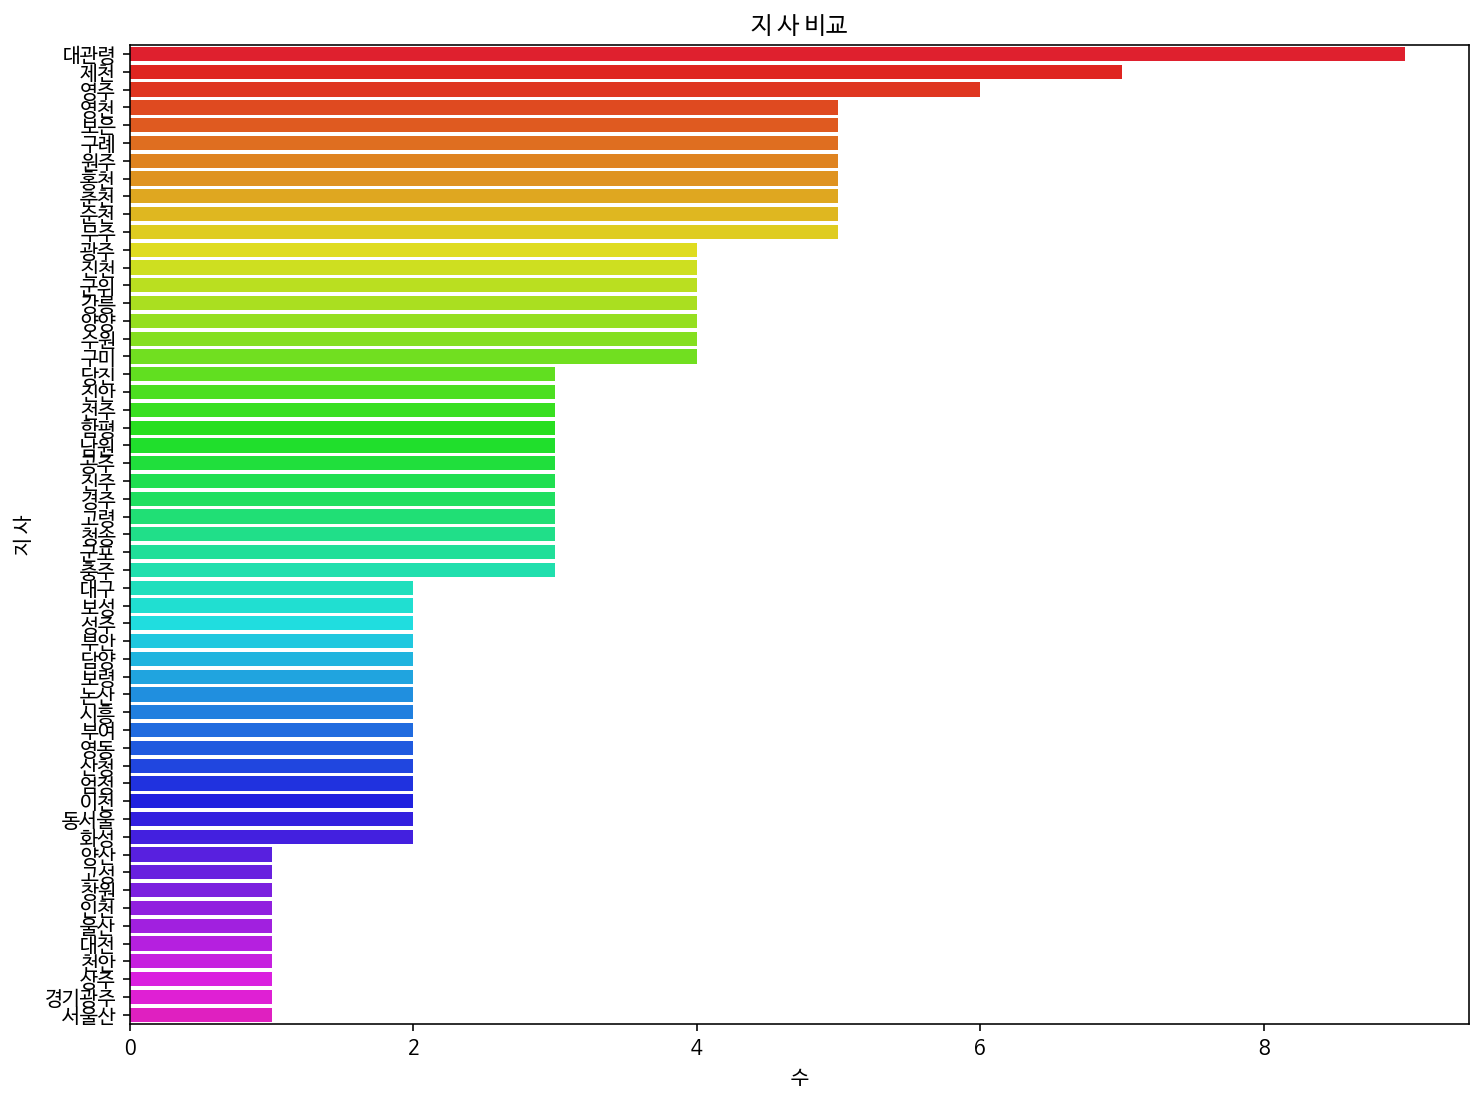

In [ ]:
# barplot 차트
x = df_freeze['지 사'].value_counts().index.tolist()
y = df_freeze['지 사'].value_counts().values.tolist()
sns.barplot(x = y, y = x, palette = 'gist_rainbow', orient='h')
plt.xlabel('수')
plt.ylabel('지 사')
plt.title('지 사 비교')

plt.show()

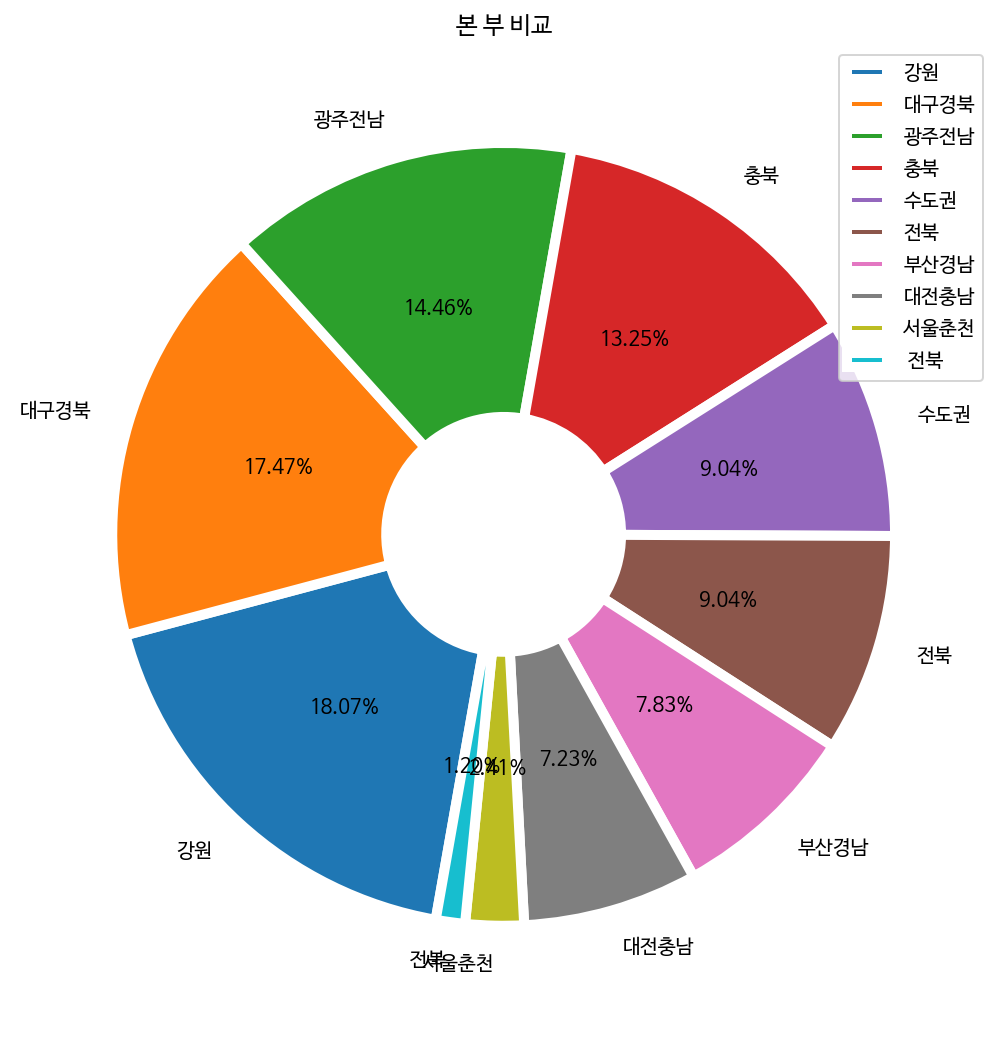

In [ ]:
# 시각화 - 본부

# 파이 차트
x = df_freeze['본 부'].value_counts().index.tolist()
y = df_freeze['본 부'].value_counts().values.tolist()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(y, labels = x, autopct = '%.2f%%', startangle = 260, counterclock = False, wedgeprops = wedgeprops)
plt.title('본 부 비교')
plt.legend(loc = 'best')

plt.show()

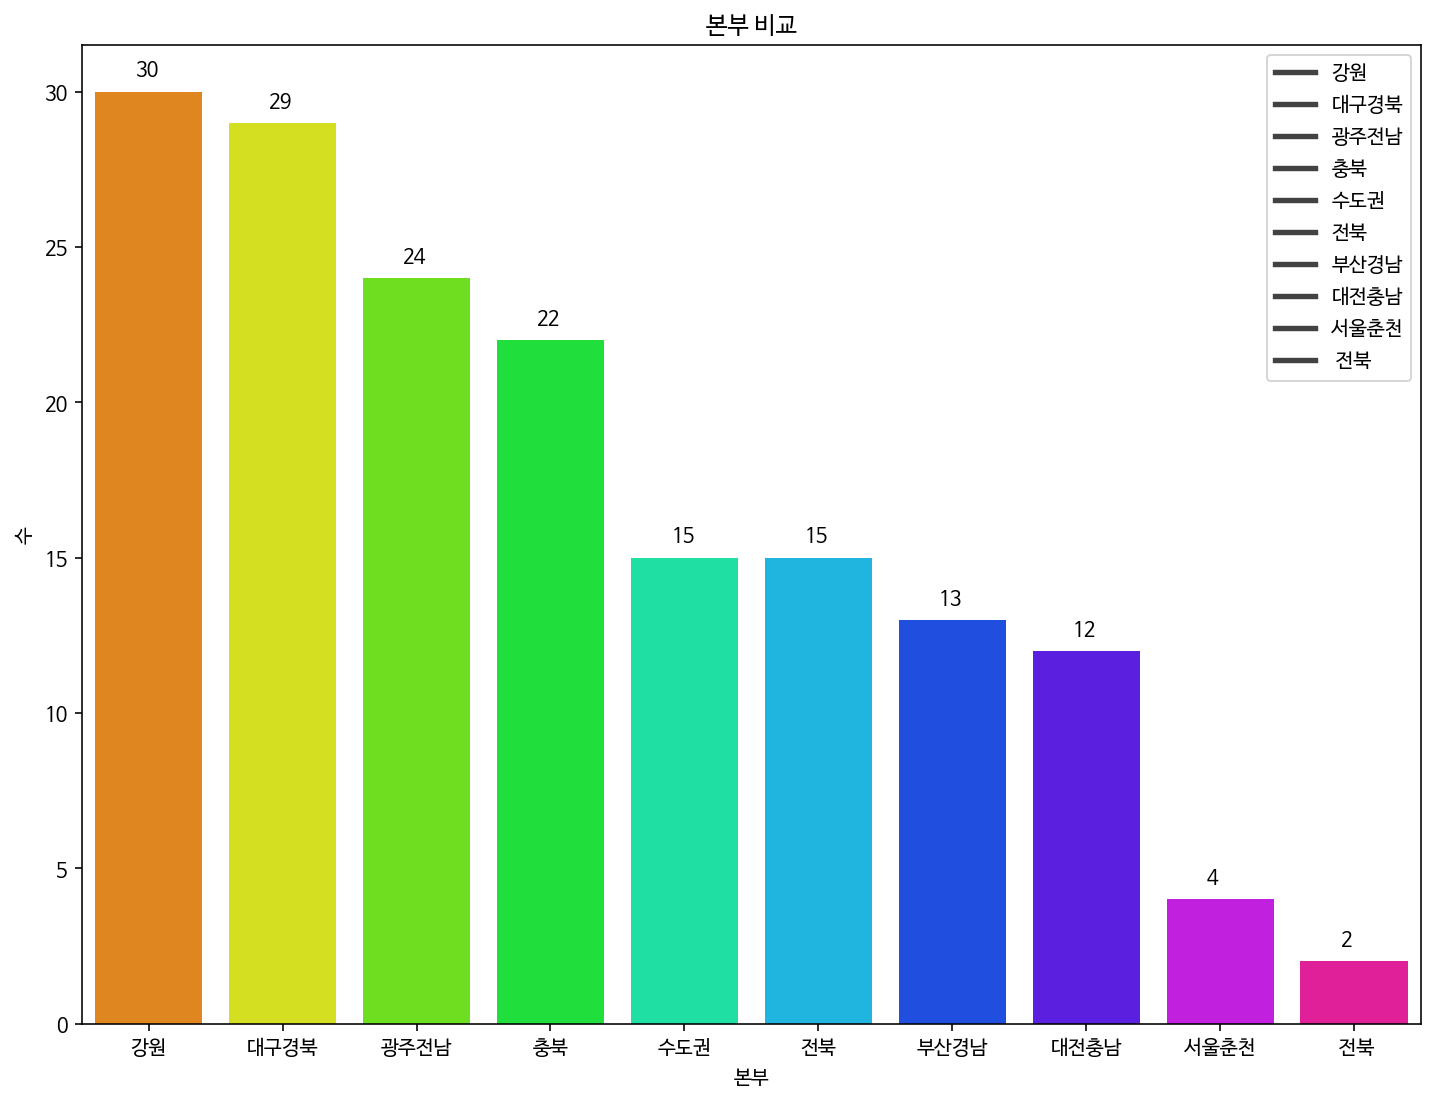

In [ ]:
# barplot 차트
x = df_freeze['본 부'].value_counts().index.tolist()
y = df_freeze['본 부'].value_counts().values.tolist()
sns.barplot(x = x, y = y, palette = 'hsv')
plt.xlabel('본부')
plt.ylabel('수')
plt.title('본부 비교')
plt.legend(x)

# 값 표시
for index, value in enumerate(y):
  plt.text(index - 0.1, value + 0.5, str(value))  

plt.show()